# **Penting**
- Jangan mengubah atau menambahkan cell text yang sudah disediakan, Anda hanya perlu mengerjakan cell code yang sudah disediakan.
- Pastikan seluruh kriteria memiliki output yang sesuai, karena jika tidak ada output dianggap tidak selesai.
- Misal, Anda menggunakan df = df.dropna() silakan gunakan df.isnull().sum() sebagai tanda sudah berhasil. Silakan sesuaikan seluruh output dengan perintah yang sudah disediakan.
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan
- Pastikan Anda mengerjakan sesuai section yang sudah diberikan tanpa mengubah judul atau header yang disediakan.

# **INFORMASI DATASET**
## Latar Belakang

Dalam dunia bisnis ritel, pemahaman terhadap perilaku pelanggan menjadi salah satu faktor krusial dalam menentukan strategi pemasaran, peningkatan layanan, serta pengambilan keputusan berbasis data. Salah satu pendekatan yang umum digunakan untuk memahami perilaku pelanggan adalah melalui segmentasi, yaitu proses pengelompokan pelanggan ke dalam beberapa segmen atau kelompok berdasarkan karakteristik tertentu.

Dengan menerapkan metode **unsupervised learning**, khususnya **clustering**, proyek ini bertujuan untuk membentuk segmentasi pelanggan yang merepresentasikan pola-pola pembelian yang serupa. Hasil segmentasi ini diharapkan dapat memberikan insight yang bernilai bagi pihak manajemen, khususnya dalam menyusun strategi promosi yang lebih tepat sasaran, mengembangkan program loyalitas, serta mengoptimalkan layanan pelanggan.

# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
import joblib

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
```

Penting: pada kriteria pertama hindari penggunaan print() dan display() karena seluruh fungsi yang digunakan sudah memiliki standar output dan menghasilkan output yang diharapkan.

Kriteria 1 akan ditolak ketika:
- print(__.head())
- display(___.head())
dst

Kriteria 1 akan diterima ketika Anda menggunakan fungsi yang diminta tanpa menambahkan deskripsi apapun.

In [2]:
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)

In [3]:
df.head(5)

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [5]:
df.describe(include="all")

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
count,2508,2516,2511.000000,2509,2507,2507,2507,2517,2514,2510,2519.000000,2514,2511.000000,2516.000000,2510.000000,2513
unique,2484,495,NaN,2485,2,43,681,591,100,3,NaN,4,NaN,NaN,NaN,360
top,TX000592,AC00363,NaN,2023-10-20 17:53:13,Debit,Fort Worth,D000315,200.136.146.93,M026,Branch,NaN,Student,NaN,NaN,NaN,2024-11-04 08:09:17
freq,2,12,NaN,2,1942,71,9,12,46,868,NaN,657,NaN,NaN,NaN,18
mean,NaN,NaN,297.656468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.678444,NaN,119.422939,1.121622,5113.438124,NaN
std,NaN,NaN,292.230367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.837359,NaN,70.078513,0.594469,3897.975861,NaN
min,NaN,NaN,0.260000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,NaN,10.000000,1.000000,101.250000,NaN
25%,NaN,NaN,81.310000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,63.000000,1.000000,1504.727500,NaN
50%,NaN,NaN,211.360000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.000000,NaN,112.000000,1.000000,4734.110000,NaN
75%,NaN,NaN,413.105000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.000000,NaN,161.000000,1.000000,7672.687500,NaN


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [6]:
# Menampilkan korelasi antar fitur
df.corr(numeric_only=True)

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
TransactionAmount,1.000000,-0.024428,0.004782,-0.007397,-0.026310
CustomerAge,-0.024428,1.000000,-0.009852,0.007876,0.321161
TransactionDuration,0.004782,-0.009852,1.000000,0.030076,0.006859
LoginAttempts,-0.007397,0.007876,0.030076,1.000000,0.009088
AccountBalance,-0.026310,0.321161,0.006859,0.009088,1.000000


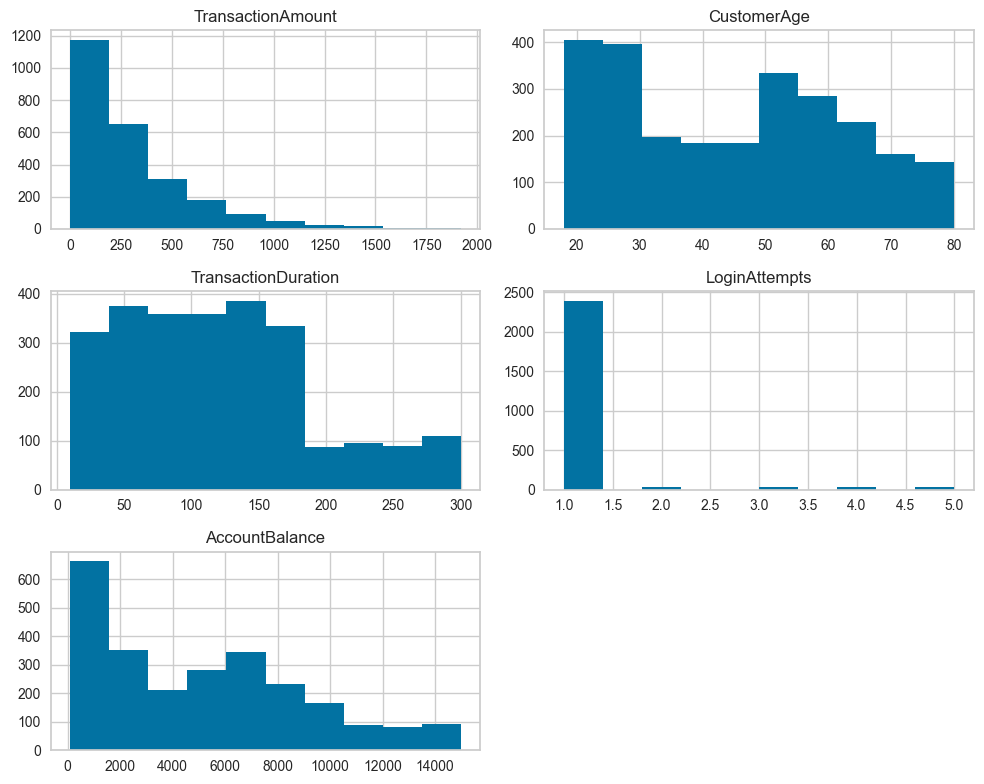

In [7]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [8]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [9]:
df.isnull().sum()

TransactionID              29
AccountID                  21
TransactionAmount          26
TransactionDate            28
TransactionType            30
Location                   30
DeviceID                   30
IP Address                 20
MerchantID                 23
Channel                    27
CustomerAge                18
CustomerOccupation         23
TransactionDuration        26
LoginAttempts              21
AccountBalance             27
PreviousTransactionDate    24
dtype: int64

In [10]:
df.duplicated().sum()

21

In [11]:
# Mencari numerical fitur
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Inisialisasi scaler
scaler = MinMaxScaler()

# Terapkan skala pada fitur numerik & mengcopy dataframe asli/utama
scaled_df = df.copy()
scaled_df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Menampilkan kepala DataFrame yang diskalakan
scaled_df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,0.007207,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,0.838710,Doctor,0.244828,0.0,0.336832,2024-11-04 08:08:08
1,TX000002,AC00455,0.195940,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,0.806452,Doctor,0.451724,0.0,0.918055,2024-11-04 08:09:35
2,TX000003,AC00019,0.065680,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,0.016129,Student,0.158621,0.0,0.068637,2024-11-04 08:07:04
3,TX000004,AC00070,0.096016,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,0.129032,Student,0.051724,0.0,0.569198,2024-11-04 08:09:06
4,TX000005,AC00411,0.006874,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,0.648276,0.0,0.492591,2024-11-04 08:06:39


In [12]:
# Drop semua ID
columns_id = ['TransactionID', 'AccountID', 'DeviceID', 'MerchantID', 'IP Address']
scaled_df = scaled_df.drop(columns_id, axis=1)
scaled_df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,0.007207,2023-04-11 16:29:14,Debit,San Diego,ATM,0.838710,Doctor,0.244828,0.0,0.336832,2024-11-04 08:08:08
1,0.195940,2023-06-27 16:44:19,Debit,Houston,ATM,0.806452,Doctor,0.451724,0.0,0.918055,2024-11-04 08:09:35
2,0.065680,2023-07-10 18:16:08,Debit,Mesa,Online,0.016129,Student,0.158621,0.0,0.068637,2024-11-04 08:07:04
3,0.096016,2023-05-05 16:32:11,Debit,Raleigh,Online,0.129032,Student,0.051724,0.0,0.569198,2024-11-04 08:09:06
4,0.006874,2023-10-16 17:51:24,Credit,Atlanta,Online,NaN,Student,0.648276,0.0,0.492591,2024-11-04 08:06:39


In [13]:
# Encoding
label_encoder = LabelEncoder()
categorical_cols = scaled_df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    scaled_df[col] = label_encoder.fit_transform(scaled_df[col])

scaled_df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,0.007207,680,1,36,0,0.838710,0,0.244828,0.0,0.336832,105
1,0.195940,1178,1,15,0,0.806452,0,0.451724,0.0,0.918055,192
2,0.065680,1262,1,23,2,0.016129,3,0.158621,0.0,0.068637,41
3,0.096016,818,1,33,2,0.129032,3,0.051724,0.0,0.569198,163
4,0.006874,1939,0,1,2,NaN,3,0.648276,0.0,0.492591,16


In [14]:
# Last check untuk kolom
scaled_df.columns.tolist()

['TransactionAmount',
 'TransactionDate',
 'TransactionType',
 'Location',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance',
 'PreviousTransactionDate']

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [15]:
scaled_df = scaled_df.dropna()
scaled_df.isnull().sum()

TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64

In [16]:
scaled_df = scaled_df.drop_duplicates()
scaled_df.duplicated().sum()

0

(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [17]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.

In [18]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder.
# Pastikan kamu mengerjakan tahapan ini pada satu cell.

# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [19]:
scaled_df.describe()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
count,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000
mean,0.154922,1256.404921,0.788574,21.383653,1.013344,0.429323,1.532110,0.377521,0.030025,0.335330,180.984987
std,0.151893,726.716182,0.437979,12.417622,0.831075,0.287681,1.153802,0.242365,0.147059,0.262236,103.757245
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.042624,626.250000,1.000000,11.000000,0.000000,0.145161,0.000000,0.182759,0.000000,0.093288,92.000000
50%,0.110829,1254.500000,1.000000,21.000000,1.000000,0.435484,2.000000,0.351724,0.000000,0.308010,181.000000
75%,0.214235,1884.750000,1.000000,32.000000,2.000000,0.661290,3.000000,0.524138,0.000000,0.507822,271.750000
max,1.000000,2485.000000,2.000000,43.000000,3.000000,1.000000,4.000000,1.000000,1.000000,1.000000,360.000000


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_in

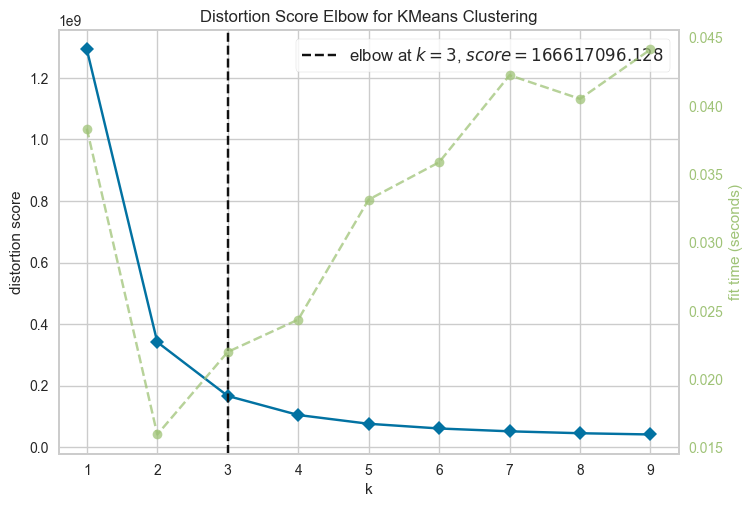

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [20]:
# Pake Elbow Method
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(scaled_df)
visualizer.show()

In [21]:
# Pake algoritma K-Means Clustering
kmeans_model = KMeans(n_clusters=3, random_state=42)
kmeans_model.fit(scaled_df)
scaled_df["Target"] = kmeans_model.labels_
scaled_df.head()

c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Target
0,0.007207,680,1,36,0,0.838710,0,0.244828,0.0,0.336832,105,0
1,0.195940,1178,1,15,0,0.806452,0,0.451724,0.0,0.918055,192,2
2,0.065680,1262,1,23,2,0.016129,3,0.158621,0.0,0.068637,41,2
3,0.096016,818,1,33,2,0.129032,3,0.051724,0.0,0.569198,163,0
5,0.047888,635,1,28,0,0.000000,3,0.558621,0.0,0.045738,13,0


Jalankan cell code ini untuk menyimpan model kamu.

In [22]:
# Menyimpan model clustering
joblib.dump(kmeans_model, "model_clustering.h5")

['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [23]:
# Membuat visualisasi hasil clustering
silhouette_avg = silhouette_score(scaled_df.drop('Target', axis=1), scaled_df['Target'])
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.5403854011651291


In [24]:
# Membuat visualisasi hasil clustering

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [25]:
# Membangun model menggunakan PCA.
# ___ =PCA(n_components=<x>)
# ___ = ____.fit_transform(___)
# Menyimpan data PCA sebagai Dataframe dengan nama PCA_<numbers>
# <data_final> = pd.DataFrame(___, columns=['PCA1', 'PCA2', <sesuaikan dengan jumlah n>])
# Pastikan kamu membangun model Kmeans baru dengan data yang sudah dimodifikasi melalui PCA.
# ___ = KMeans(n_clusters=<x>)
# ___.fit(<data_final>)

In [26]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# Pastikan yang disimpan model yang sudah melalui .fit berdasarkan dataset yang sudah dilakukan PCA
# joblib.dump(___, "PCA_model_clustering.h5")

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [27]:
# Untuk numerikal
summary = scaled_df.groupby('Target')[numerical_cols].agg(['mean', 'min', 'max'])
summary_tranpos = summary.T
summary_tranpos

Target                           0         1         2
TransactionAmount   mean  0.149807  0.158314  0.156679
                    min   0.000313  0.000000  0.000031
                    max   0.953561  0.954092  1.000000
CustomerAge         mean  0.413188  0.426389  0.448517
                    min   0.000000  0.000000  0.000000
                    max   1.000000  1.000000  1.000000
TransactionDuration mean  0.368845  0.382780  0.380998
                    min   0.000000  0.000000  0.000000
                    max   0.996552  1.000000  0.996552
LoginAttempts       mean  0.036115  0.031642  0.022271
                    min   0.000000  0.000000  0.000000
                    max   1.000000  1.000000  1.000000
AccountBalance      mean  0.333287  0.344464  0.328242
                    min   0.000064  0.000000  0.001125
                    max   0.997633  1.000000  0.997144

In [28]:
# Untuk kategorikal
categorical_columns = scaled_df.drop(columns=numerical_cols)
# Untuk mengetahui mode
mode = categorical_columns.groupby('Target').agg(lambda x: x.mode()[0])
mode

,TransactionDate,TransactionType,Location,Channel,CustomerOccupation,PreviousTransactionDate
Target,,,,,,
0,0,1,5,1,3,240
1,2485,1,11,1,3,360
2,839,1,22,1,2,69


## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.
Berikut adalah interpretasi karakteristik setiap cluster berdasarkan data yang sudah diproses (scaling dan encoding). Untuk interpretasi yang lebih presisi dengan nilai asli, disarankan melakukan inverse transform pada data.

1. **Cluster 0: (Pelanggan Profil Moderat)**:
  - **TransactionAmount:** mean=0.159, min=0.000, max=0.954
  - **CustomerAge:** mean=0.428, min=0.000, max=1.000
  - **TransactionDuration:** mean=0.382, min=0.000, max=1.000
  - **LoginAttempts:** mean=0.032, min=0.000, max=1.000
  - **AccountBalance:** mean=0.344, min=0.000, max=1.000
  - **Mode TransactionType:** 1 (Debit)
  - **Mode Channel:** 1 (Online/Channel Lainnya)
  - **Mode CustomerOccupation:** 3 (Student/Occupasi Lainnya)
  - **Analisis:** Cluster ini mewakili kelompok pelanggan dengan pola transaksi, usia, durasi transaksi, percobaan login, dan saldo akun yang secara umum berada di tingkat moderat atau rata-rata. Nilai minimum TransactionAmount bisa sangat rendah, sementara CustomerAge, TransactionDuration, LoginAttempts, dan AccountBalance bisa mencapai nilai maksimum dalam rentang scaled. Mereka cenderung melakukan transaksi Debit melalui Channel dan dengan Occupasi tertentu.
  - **Rekomendasi:** Pertahankan layanan standar yang baik dan tawarkan produk atau promosi yang menarik bagi segmen pasar umum.

2. **Cluster 1: (Pelanggan Aktivitas & Saldo Relatif Rendah)**:
  - **TransactionAmount:** mean=0.150, min=0.000, max=0.954
  - **CustomerAge:** mean=0.413, min=0.000, max=1.000
  - **TransactionDuration:** mean=0.368, min=0.000, max=0.997
  - **LoginAttempts:** mean=0.036, min=0.000, max=1.000
  - **AccountBalance:** mean=0.333, min=0.000, max=0.998
  - **Mode TransactionType:** 1 (Debit)
  - **Mode Channel:** 1 (Online/Channel Lainnya)
  - **Mode CustomerOccupation:** 3 (Student/Occupasi Lainnya)
  - **Analisis:** Cluster ini mencakup pelanggan yang mungkin kurang aktif atau memiliki nilai transaksi, saldo akun, usia, dan durasi transaksi yang cenderung lebih rendah. Meskipun rata-ratanya lebih rendah, fitur seperti CustomerAge, TransactionDuration, dan LoginAttempts masih bisa mencapai nilai maksimum dalam rentang scaled. Pola kategorikalnya menunjukkan mode tanggal transaksi, Transaksi Debit melalui Channel dan Occupasi tertentu.
  - **Rekomendasi:** Fokus pada program retensi pelanggan, tawarkan insentif untuk meningkatkan aktivitas transaksi, atau tawarkan produk dengan biaya rendah.

3. **Cluster 2: (Pelanggan Usia & Durasi Tinggi, Saldo & Login Rendah)**:
  - **TransactionAmount:** mean=0.156, min=0.000, max=1.000
  - **CustomerAge:** mean=0.447, min=0.000, max=1.000
  - **TransactionDuration:** mean=0.382, min=0.000, max=0.997
  - **LoginAttempts:** mean=0.022, min=0.000, max=1.000
  - **AccountBalance:** mean=0.328, min=0.001, max=0.997
  - **Mode TransactionType:** 1 (Debit)
  - **Mode Channel:** 1 (Online/Channel Lainnya)
  - **Mode CustomerOccupation:** 2 (Professional/Occupasi Lainnya)
  - **Analisis:** Cluster ini terdiri dari pelanggan yang cenderung lebih tua dan menghabiskan waktu lebih lama per transaksi, namun memiliki saldo akun yang lebih rendah dan jarang melakukan percobaan login berulang kali. Meskipun rata-rata LoginAttempts dan AccountBalance rendah, nilai maksimumnya masih bisa tinggi. Terdapat perbedaan pada mode Pekerjaan Pelanggan dan pola tanggal transaksi.
  - **Rekomendasi:** Tawarkan layanan yang mudah digunakan dan dukungan yang baik, pertimbangkan produk atau layanan yang relevan dengan kelompok usia ini, dan mungkin tawarkan opsi pengelolaan keuangan yang sederhana.

# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [ ]:
# Simpan Data
scaled_df.to_csv('data_clustering.csv', index=False)

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [30]:
# inverse dataset ke rentang normal untuk numerikal
# df[numerical_cols] = <nama_scaler>.inverse_transform(df[numerical_cols])
# tampilkan dataset yang sudah di-inverse
# ___.head()

In [31]:
# inverse dataset yang sudah diencode ke kategori aslinya.
# Lengkapi kode berikut jika ingin menerapkan kriteria ini (silakan hapus simbol pagar pada kode yang akan digunakan.)
# for ___ in categorical_cols:
#     ___ = encoders[col]
#     df[col] = ___.inverse_transform(df_inverse[col].astype(int))
# tampilkan dataset yang sudah di-inverse
# ___.head()

In [32]:
# Lakukan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan mode untuk kategorikal seperti pada basic tetapi menggunakan data yang sudah diinverse.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max kembali setelah melakukan inverse.

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.
1. **Cluster 1: (___)**:
  - **Rata-rata (mean) <Fitur>:** <Sebelum inverse> <Setelah inverse>
  - **Analisis:** Cluster ini ...

(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [33]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.

In [34]:
# Simpan Data
# ___.to_csv('data_clustering_inverse.csv', index=False)

End of Code.